# 在進入文字探勘的世界之前

請先確認以下動作已經完成：
1. 登錄您的 Google 帳號
2. 將本單元的課程資料夾「新增雲端硬碟捷徑（Add shortcut to Drive）」至您的 [Google Drive](https://drive.google.com/drive) 中
3. 按上方工具列的 `「檔案（Files）」` -> `「在雲端硬碟中儲存副本（Make a copy）」`，會跳出一個分頁，請使用該分頁來上課。複製的檔案會儲存在您的 [Google Drive](https://drive.google.com/drive) 的 `「Colab Notebooks」` 資料夾裡

完成後，讓我們往下個儲存格前進。

In [1]:
from google.colab import drive

try:
  drive.mount("/content/drive")
  print("Drive is mounted successfully")
except:
  print("Error: Failed to mount drive")

Mounted at /content/drive
Drive is mounted successfully


# 載入套件
- 如果你需要一個特定的功能，比如說處理文字、處理日期、處理圖像等，在 Python 當中，通常都已經有現成的程式碼可以使用，這就叫做「套件」。

- 套件在安裝後，通常可以直接拿來使用，讓你可以更快速地開發出自己的程式。  

- 使用套件的好處：提高程式碼可讀性、可維護性，讓程式更易於理解和修改。






In [2]:
"""設定檔案路徑、路徑套件"""
import os
import glob
from pathlib import Path 
DOCS_DIR = Path("/content/drive/MyDrive/docs")
UTILS_DIR = Path("/content/drive/MyDrive/docs/utils_doc")

"""設定 Jieba 相關辭典"""
import jieba
import jieba.analyse
jieba.set_dictionary(f"{UTILS_DIR}/dict.txt") # 載入繁中辭典
jieba.load_userdict(f"{UTILS_DIR}/userdict.txt") # 設置使用者辭典 （自行新增的詞語）
jieba.analyse.set_stop_words(f"{UTILS_DIR}/stopdict.txt") # 設置停用詞辭典

"""ignore warning"""
import warnings
warnings.filterwarnings("ignore")

"""資料處理、繪圖套件"""
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 繪圖套件
from wordcloud import WordCloud # 文字雲套件
from sklearn.feature_extraction.text import TfidfVectorizer 

Building prefix dict from /content/drive/MyDrive/docs/utils_doc/dict.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/docs/utils_doc/dict.txt ...
Dumping model to file cache /tmp/jieba.udbf2fc394b723b6f0e78fc652ba4b7e6.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.udbf2fc394b723b6f0e78fc652ba4b7e6.cache
Loading model cost 1.062 seconds.
DEBUG:jieba:Loading model cost 1.062 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


# 【基礎】文字探勘實作練習：歌詞資料練習

在【基礎】的實作練習，我們會先使用簡單的歌詞資料集來練習計算「TF-IDF」、繪製「文字雲」。

實作內容：  

- 讀取歌詞檔案   
    從一個 txt 檔中讀取歌詞資料（忘情水.txt），將這些資料儲存到程式中，以便後續分析。

-  計算 TF-IDF    
    使用 Jieba 套件所提供的 TF-IDF 方法計算
  
-  繪製文字雲    
    文字雲可以讓我們快速地了解文本中的關鍵詞，以便進行進一步的分析和處理。

## 步驟一：載入歌詞檔案
在此步驟，我們要載入歌詞的檔案：「忘情水.txt」。

In [ ]:
# 設定檔案路徑
SONG_DIR = f"{DOCS_DIR}/忘情水.txt"

# 讀取檔案，變數命名為：lyrics
with open(SONG_DIR, mode="r", encoding="utf-8-sig") as f:
    lyrics = f.read()

# 查看載入的檔案是否正確
print(lyrics)

## 步驟二：資料清理
做簡單的資料清理：去除換行符號、空白

In [ ]:
# 做一些簡單的資料清理：去除換行符號（\n）、空白
lyrics = lyrics.replace("\n", "").replace(" ", "")

# 查看清理後內容
print(lyrics)

## 步驟三：斷詞

### 為什麼要切詞？

> 因為，單詞是語言的最小單位

就像小時候讀課文時，老師都會要求我們背單詞的解釋。而電腦也是一樣，對電腦來說，最簡單的學習方法，也是從單詞來學習。

然而，中文不像英文有空格斷開每個字，中文的「詞」和「詞」之間沒有邊界。所以若要電腦理解一篇中文文章，必須先進行斷詞。


### 範例：
`「我愛文字探勘」` 斷完詞後會變成：`「我」、「愛」、「文字探勘」`

[Jieba 官方文件](https://github.com/fxsjy/jieba)

In [ ]:
# 斷詞
words = jieba.lcut(lyrics)
print(words)

In [ ]:
# 斷詞並計算 TF-IDF
tfidf_words = jieba.analyse.extract_tags(lyrics, topK=20, withWeight=True)
print(tfidf_words)

## 步驟四：繪製文字雲
> 文字雲：讓讀者不用閱讀完整文章，即可快速認識這篇文章在談論的主要內容  


In [ ]:
def word_cloud(
        plot_title: str = "文字雲",
        sentence: str = None, 
        num_words: int = 30,
        **kwags
    ) -> None : 

    # jieba 切詞
    tfidf_words = jieba.analyse.extract_tags(sentence, topK=num_words, withWeight=True)

    # 整理成可繪製文字雲的格式
    words_df = pd.DataFrame(
       tfidf_words,
       columns = ["字詞", "TF-IDF"]
       )
    
    d = dict(zip(words_df["字詞"].to_list(), words_df["TF-IDF"].to_list()))

    # 繪製文字雲
    wc = WordCloud(
        background_color=kwags["set_background_color"], # 設定圖片背景顏色
        collocations=True, # 是否包括兩個詞的搭配
        font_path=f"{UTILS_DIR}/SimHei.ttf", # 若為中文則需引入中文字型(.TTF) 
        max_font_size=48, # 顯示字體的最大值
        colormap=kwags["set_colormap"],  # 設定每個文字的顏色
        )
    
    # 在 colab 中顯示文字雲
    wc.generate_from_frequencies(d)
    plt.title(f"{plot_title}")
    plt.imshow(wc)
    plt.show()


In [ ]:
# 繪製歌詞文字雲
word_cloud(
    plot_title="Lyrics wordcloud",
    sentence=lyrics, # 輸入歌詞資料集
    num_words=30, # 設定要顯示在文字雲的字詞數量，整數
    set_background_color="white", # 設定圖片背景顏色，可選：white、black、gray、yellow、red...
    set_colormap="CMRmap", # 設定每個文字的顏色，可選：'Accent', 'Blues', 'CMRmap', 'Oranges' , 'viridis', 'winter'...
    )


# 【進階】文字探勘實作練習：DataStation 新聞媒體文本
在【進階】的實作練習，我們將使用新聞媒體文本來計算「TF-IDF」、繪製「文字雲」。此資料集蒐集了台灣逾 2000 個新聞媒體網站及主流論壇網站於指定時間區間範圍（202005 - 202012）的公開資料。

實作內容：

- 讀取新聞資料集  
   提供已完成前處理過的資料集，分析每個月份的新聞文本。

-  計算 TF-IDF  
   使用 scikit-learn 套件所提供的 TF-IDF 方法計算。  
   scikit-learn 是一個知名的機器學習套件，它提供許多常見的機器學習演算法，如：分類、迴歸、聚類、降維等，也提供資料預處理、特徵提取、模型選擇，以及模型評估等所需的函數模組。
  
-  繪製文字雲  
   讓學生透過實際操作找出各月份新聞文本中的關鍵字，並將其視覺化，以不同的角度分析如何應用從文字雲觀察到的關鍵字與趨勢，制定商業決策。

更多請參考 [資料集來源](https://www.datastation.org.tw/datasets/5)

## 步驟一 ： 載入前處理後檔案

在 **clean_media** 資料夾當中，總共有八個月份（202005 - 202012）、每個月大約有 1000 筆的新聞文本，我們先挑其中一個月的資料集看看吧！  

資料欄位介紹：
- `title`：新聞標題
- `content`：新聞內容
- `text`：合併新聞標題與新聞內容，使用 Jieba 進行斷詞與去除停用詞後的結果

In [ ]:
df = pd.read_json(f"{DOCS_DIR}/clean_media/clean_media_202005.json") 
df.head()

接著我們要將 5-12 月的新聞都讀進來，這時可以使用 `glob 模組` 來讀取某個路徑下所有檔案

更多請參考 [glob 官方文件](https://docs.python.org/3/library/glob.html)

In [ ]:
glob.glob(f"{DOCS_DIR}/clean_media/*.json") # 讀取clean_media資料夾內所有副檔名為.json的檔案

我們的目標是讀取 5-12 月份所有新聞文本，計算新聞中每個字詞的 TF-IDF，並找出在這段期間新聞的關鍵詞與繪製文字雲，我們將資料以列表（list）的形式儲存。 
- 什麼是列表？列表是 Python 常見的儲存資料的結構，每一個元素（element）可能是一個數值、也有可能是一個字串；而每一個元素都有一個自己的索引（index），從 0 開始計數。
![list introduction](https://selflearningsuccess.com/wp-content/uploads/2020/11/%E4%BD%8D%E7%BD%AEindex.png)
- 由於資料集期間為 5-12 月，程式會從 5 月開始讀取，再來是 6 月、7月...，依此類推。 

- `total_news`：為**一維列表**，用於儲存 5-12 月所有新聞，設計結構如下圖所示。
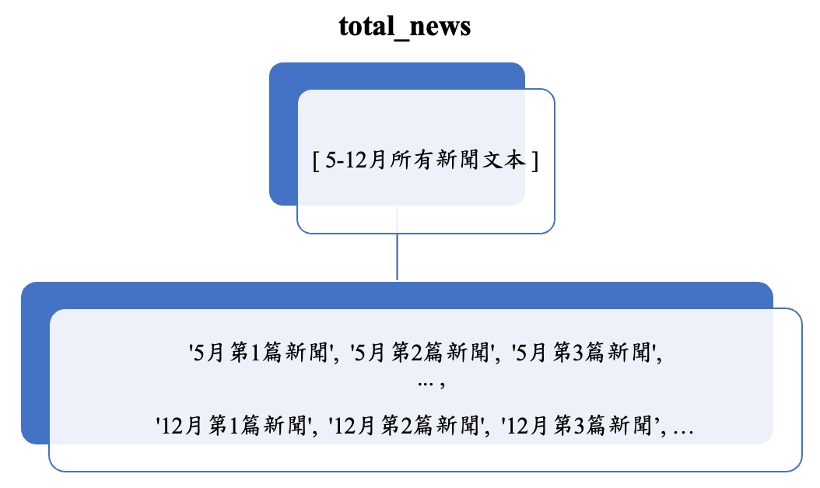

In [ ]:
files = glob.glob(f"{DOCS_DIR}/clean_media/*.json") # 讀取clean_media資料夾內所有副檔名為.json的檔案
total_news = []

# 透過for迴圈依序讀取每月新聞文本(斷詞後)到程式中
for file in sorted(files):
    df = pd.read_json(file)
    total_news += df["text"].to_list() # e.g. ["5月第1篇新聞", "5月第2篇新聞", "5月第3篇新聞", ..., "6月第1篇新聞", ..., "12月最後1篇新聞"]

In [ ]:
# len()函數可以計算列表內的項目個數，total_news儲存5-12月所有新聞，我們可以使用len()函數計算total_news的長度
print(len(total_news)) # 總共有7954篇新聞 

In [ ]:
# 隨機挑選一篇新聞並展示其斷詞結果
total_news[0]

## 步驟二：計算 TF-IDF 與繪製文字雲

scikit-learn 的 TF-IDF 方法計算的結果會輸出一個 TF-IDF 特徵矩陣，顯示**每一個字詞在每一篇新聞文本中的 TF-IDF 分數**。
- 但是，現在有將近 8000 篇新聞文本，我們要如何從眾多新聞中找出重要的關鍵詞呢？有一個簡單的做法 -> **將字詞在每篇新聞文本的 TF-IDF 分數相加計算出總分 (下圖紅字區塊)，TF-IDF 總分越高我們就認為它是比較重要的字詞**
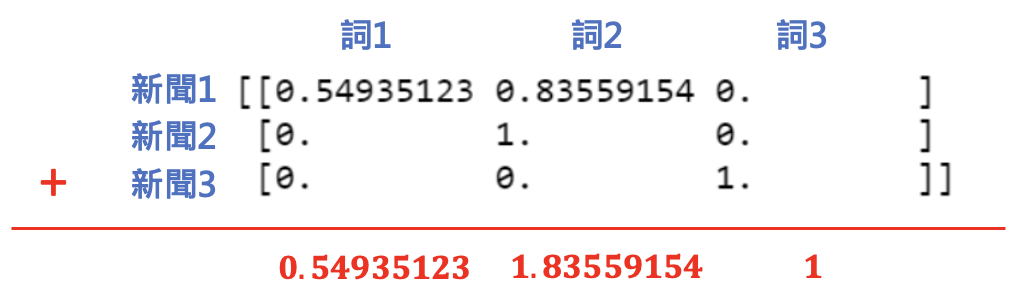

In [ ]:
def word_cloud(
        plot_title: str = "文字雲",
        sentence: str = None, 
        num_words: int = 30,
        **kwags
    ) -> None :
    
    # 運用scikit-learn套件所提供的TF-IDF方法
    vectorizer = TfidfVectorizer(smooth_idf=True) # TfidfVectorizer可以把原始文本轉換為TF-IDF特徵矩陣
    tfidf = vectorizer.fit_transform(sentence) # 輸入新聞文本計算字詞的TF-IDF，獲取TF-IDF特徵矩陣

    # 整理成可繪製文字雲的格式
    words_df = pd.DataFrame({
        "字詞": vectorizer.get_feature_names_out(), # 查看所有的字詞
        "TF-IDF": tfidf.toarray().sum(axis=0).tolist() # 將TF-IDF矩陣中每個字詞的TF-IDF分數加總，計算出總分
        })

    top_words = words_df.sort_values(by="TF-IDF", ascending=False)[:num_words] # 挑選TF-IDF總分最高的前N個字詞作為top_words
    d = dict(zip(top_words["字詞"].to_list(), top_words["TF-IDF"].to_list()))

    # 繪製文字雲
    wc = WordCloud(
        background_color=kwags["set_background_color"], # 設定圖片背景顏色
        collocations=True, # 是否包括兩個詞的搭配
        font_path=f"{UTILS_DIR}/SimHei.ttf", # 若為中文則需引入中文字型(.TTF) 
        max_font_size=48, # 顯示字體的最大值
        colormap=kwags["set_colormap"],  # 設定每個文字的顏色
        )
    
    wc.generate_from_frequencies(d)
    plt.title(f'{plot_title}')
    plt.imshow(wc)
    plt.show()

In [ ]:
# 繪製總體文字雲
word_cloud(
        plot_title="Month:All", # 設定圖表標題名稱
        sentence=total_news, # 輸入5-12月所有新聞文本
        num_words=30, # 設定要顯示在文字雲的字詞數量，整數
        set_background_color="white", # 設定圖片背景顏色，可選：white、black、gray、yellow、red...
        set_colormap="viridis", # 設定每個文字的顏色，可選：'Accent', 'Blues', 'CMRmap', 'Oranges' , 'viridis', 'winter'...
        )

## 課堂補充：計算每月新聞TF-IDF與繪製文字雲

我們也可以計算**每月**新聞的 TF-IDF 以及繪製文字雲，但是需要改變原本儲存資料的形式，我們將資料以列表（list）的形式儲存。
- 什麼是列表？列表是 Python 常見的儲存資料的結構，每一個元素（element）可能是一個數值、也有可能是一個字串；而每一個元素都有一個自己的索引（index），從 0 開始計數。
![list introduction](https://selflearningsuccess.com/wp-content/uploads/2020/11/%E4%BD%8D%E7%BD%AEindex.png)
- 由於資料集期間為 5-12 月，程式會從 5 月開始讀取，再來是 6 月、7月...，依此類推。

- `month_news`：依據月份儲存新聞，為**二維列表**，其中第 0 維表示第幾個月份、第 1 維表示第幾篇新聞，結構設計如下圖。
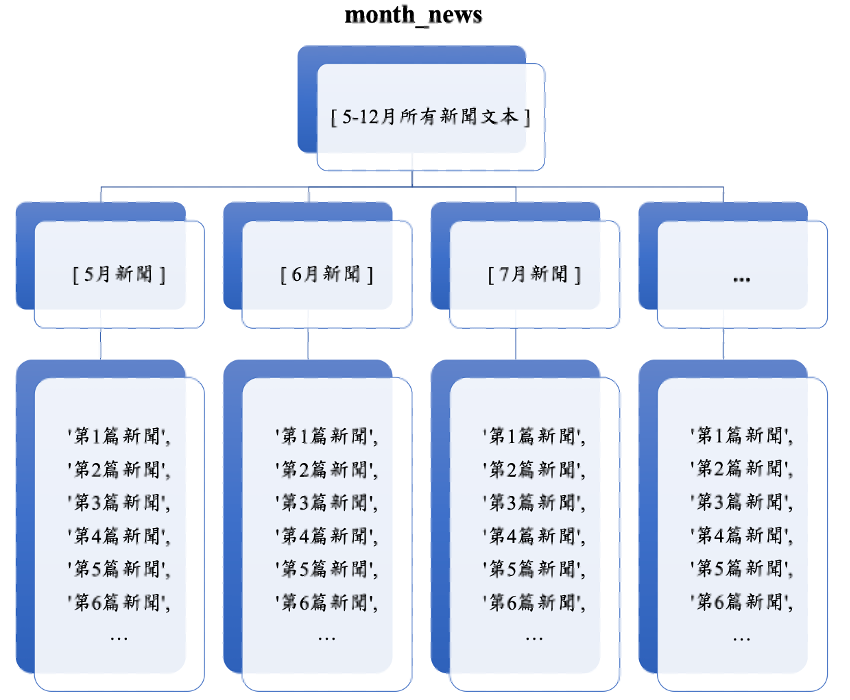

In [ ]:
files = glob.glob(f"{DOCS_DIR}/clean_media/*.json") # 讀取clean_media資料夾內所有副檔名為.json的檔案
month_news = []

# 透過for迴圈依序讀取每月新聞文本到程式中
for file in sorted(files):
    df = pd.read_json(file)
    month_news.append(df["text"].to_list()) # e.g. [["5月第1篇新聞", "5月第2篇新聞", "5月第3篇新聞", ...], ["6月第1篇新聞", "6月第2篇新聞", "6月第3篇新聞", ...], ...]

In [ ]:
# month_news按照月份儲存新聞，我們可以使用len()函數計算month_news中有多少月份
print(len(month_news)) # 5-12月份總共8個月

In [ ]:
# month_news[0]代表5月的新聞列表，裡面包含5月的所有新聞，我們可以使用len()函數來觀察5月有幾篇新聞
len(month_news[0])  # 5月有1000篇新聞

In [ ]:
month_news[0][0] # 展示5月第1篇新聞斷詞結果

In [ ]:
month_news[3][5] # 展示8月第6篇新聞斷詞結果

In [ ]:
# 繪製5-12月文字雲
for i, news in enumerate(month_news):
    word_cloud(
        plot_title="Month:"+str(i+5), # 設定圖表標題名稱
        sentence=news, # 輸入每月新聞文本
        num_words=30, # 設定要顯示在文字雲的字詞數量，整數
        set_background_color="white", # 設定圖片背景顏色，可選：white、black、gray、yellow、red...
        set_colormap="viridis", # 設定每個文字的顏色，可選：'Accent', 'Blues', 'CMRmap', 'Oranges' , 'viridis', 'winter'...
        )